In [1]:
import pandas as pd
import datetime 
import psycopg2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sklearn.preprocessing
from config import db_password

In [2]:
playlist_df = pd.read_csv(f'./Resources/features.csv', index_col=0)

In [3]:
playlist_df['duration_mins'] = pd.to_datetime(playlist_df['duration_ms'], unit='ms').dt.strftime('%H:%M:%S')

In [4]:
playlist_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,duration_mins
0,0.798,0.697,0,-7.139,1,0.0891,0.020200,0.000000,0.2590,0.745,90.031,audio_features,0skYUMpS0AcbpjcGsAbRGj,spotify:track:0skYUMpS0AcbpjcGsAbRGj,https://api.spotify.com/v1/tracks/0skYUMpS0Acb...,https://api.spotify.com/v1/audio-analysis/0skY...,186964,4,00:03:06
1,0.646,0.640,8,-5.554,1,0.0304,0.001190,0.000000,0.1380,0.127,105.957,audio_features,7up4SX2l8FAnisrUXoGupd,spotify:track:7up4SX2l8FAnisrUXoGupd,https://api.spotify.com/v1/tracks/7up4SX2l8FAn...,https://api.spotify.com/v1/audio-analysis/7up4...,175699,4,00:02:55
2,0.950,0.891,2,-2.653,1,0.2410,0.064500,0.000018,0.3090,0.912,133.010,audio_features,4C6Uex2ILwJi9sZXRdmqXp,spotify:track:4C6Uex2ILwJi9sZXRdmqXp,https://api.spotify.com/v1/tracks/4C6Uex2ILwJi...,https://api.spotify.com/v1/audio-analysis/4C6U...,170977,4,00:02:50
3,0.762,0.861,0,-3.296,1,0.0955,0.018500,0.000000,0.2640,0.955,120.048,audio_features,0xzI1KAr0Yd9tv8jlIk3sn,spotify:track:0xzI1KAr0Yd9tv8jlIk3sn,https://api.spotify.com/v1/tracks/0xzI1KAr0Yd9...,https://api.spotify.com/v1/audio-analysis/0xzI...,172714,4,00:02:52
4,0.871,0.485,7,-8.294,0,0.0411,0.527000,0.000074,0.1690,0.494,119.976,audio_features,5rbuv6zso7QSaKt265H3M3,spotify:track:5rbuv6zso7QSaKt265H3M3,https://api.spotify.com/v1/tracks/5rbuv6zso7QS...,https://api.spotify.com/v1/audio-analysis/5rbu...,219036,4,00:03:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8100,0.479,0.938,2,-3.058,1,0.0376,0.000075,0.000153,0.1170,0.431,140.056,audio_features,6kNOYOpdMy0w67fC4XPc0q,spotify:track:6kNOYOpdMy0w67fC4XPc0q,https://api.spotify.com/v1/tracks/6kNOYOpdMy0w...,https://api.spotify.com/v1/audio-analysis/6kNO...,264467,4,00:04:24
8101,0.582,0.730,11,-7.678,1,0.0402,0.260000,0.000004,0.1100,0.240,129.981,audio_features,5o9CWfDLfSLJ22BtUSMLBt,spotify:track:5o9CWfDLfSLJ22BtUSMLBt,https://api.spotify.com/v1/tracks/5o9CWfDLfSLJ...,https://api.spotify.com/v1/audio-analysis/5o9C...,201668,4,00:03:21
8102,0.481,0.917,2,-3.366,1,0.0385,0.001040,0.000004,0.3980,0.377,108.747,audio_features,1f8G4jvkONnLMxJMx7V2Ck,spotify:track:1f8G4jvkONnLMxJMx7V2Ck,https://api.spotify.com/v1/tracks/1f8G4jvkONnL...,https://api.spotify.com/v1/audio-analysis/1f8G...,185317,4,00:03:05
8103,0.628,0.787,4,-6.540,1,0.0328,0.003760,0.027200,0.0872,0.611,137.981,audio_features,4Yzy5bGrMOlLpYcOtWxGIM,spotify:track:4Yzy5bGrMOlLpYcOtWxGIM,https://api.spotify.com/v1/tracks/4Yzy5bGrMOlL...,https://api.spotify.com/v1/audio-analysis/4Yzy...,179947,4,00:02:59


In [7]:
playlist_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8105 entries, 0 to 8104
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      8105 non-null   float64
 1   energy            8105 non-null   float64
 2   key               8105 non-null   int64  
 3   loudness          8105 non-null   float64
 4   mode              8105 non-null   int64  
 5   speechiness       8105 non-null   float64
 6   acousticness      8105 non-null   float64
 7   instrumentalness  8105 non-null   float64
 8   liveness          8105 non-null   float64
 9   valence           8105 non-null   float64
 10  tempo             8105 non-null   float64
 11  type              8105 non-null   object 
 12  id                8105 non-null   object 
 13  uri               8105 non-null   object 
 14  track_href        8105 non-null   object 
 15  analysis_url      8105 non-null   object 
 16  duration_ms       8105 non-null   int64  


In [ ]:
plt.scatter(playlist_df.danceability, playlist_df.tempo)
plt.xlabel('Danceability')
plt.ylabel('Tempo')
plt.show()

In [ ]:
plt.scatter(playlist_df.danceability, playlist_df.energy)
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.show()

In [ ]:
plt.scatter(playlist_df.valence, playlist_df.energy)
plt.xlabel('Valence')
plt.ylabel('Energy')
plt.show()

In [ ]:
plt.scatter(playlist_df.duration_mins, playlist_df.danceability)
plt.xlabel('Duration')
plt.ylabel('Danceability')
plt.show()

In [ ]:
plt.scatter(playlist_df.duration_mins, playlist_df.valence)
plt.xlabel('Duration')
plt.ylabel('Valence')
plt.show()

In [ ]:
plt.scatter(playlist_df.loudness, playlist_df.energy)
plt.xlabel('Loudness')
plt.ylabel('Energy')
plt.show()

In [ ]:
plt.scatter(playlist_df.acousticness, playlist_df.energy)
plt.xlabel('Acousticness')
plt.ylabel('Energy')
plt.show()

In [5]:
playlist_df.corr(method='pearson')

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
danceability,1.000000,0.183270,0.029864,0.441652,-0.101312,0.211238,-0.249480,-0.285077,-0.145491,0.514608,-0.097695,-0.145028,0.223162
energy,0.183270,1.000000,0.052288,0.746040,-0.074041,0.109129,-0.770702,-0.342090,0.246476,0.336418,0.200661,0.046332,0.206869
key,0.029864,0.052288,1.000000,0.040667,-0.155194,0.004142,-0.026261,-0.003081,0.000065,0.049325,0.011366,0.003158,0.019175
loudness,0.441652,0.746040,0.040667,1.000000,-0.061605,0.141378,-0.670822,-0.621054,0.055527,0.386349,0.198285,0.045183,0.254293
mode,-0.101312,-0.074041,-0.155194,-0.061605,1.000000,-0.048837,0.055546,-0.036817,-0.010934,-0.037635,0.030818,-0.026269,-0.033017
speechiness,0.211238,0.109129,0.004142,0.141378,-0.048837,1.000000,-0.118288,-0.165539,0.034763,0.067467,0.111954,-0.135571,0.050849
acousticness,-0.249480,-0.770702,-0.026261,-0.670822,0.055546,-0.118288,1.000000,0.375775,-0.154998,-0.265959,-0.182260,-0.048382,-0.204704
instrumentalness,-0.285077,-0.342090,-0.003081,-0.621054,-0.036817,-0.165539,0.375775,1.000000,-0.012492,-0.249596,-0.136190,0.036523,-0.160432
liveness,-0.145491,0.246476,0.000065,0.055527,-0.010934,0.034763,-0.154998,-0.012492,1.000000,-0.049799,0.020905,-0.047574,-0.015479
valence,0.514608,0.336418,0.049325,0.386349,-0.037635,0.067467,-0.265959,-0.249596,-0.049799,1.000000,0.069550,-0.104602,0.157712


array([[<AxesSubplot:xlabel='danceability', ylabel='danceability'>,
        <AxesSubplot:xlabel='energy', ylabel='danceability'>,
        <AxesSubplot:xlabel='loudness', ylabel='danceability'>,
        <AxesSubplot:xlabel='acousticness', ylabel='danceability'>,
        <AxesSubplot:xlabel='instrumentalness', ylabel='danceability'>],
       [<AxesSubplot:xlabel='danceability', ylabel='energy'>,
        <AxesSubplot:xlabel='energy', ylabel='energy'>,
        <AxesSubplot:xlabel='loudness', ylabel='energy'>,
        <AxesSubplot:xlabel='acousticness', ylabel='energy'>,
        <AxesSubplot:xlabel='instrumentalness', ylabel='energy'>],
       [<AxesSubplot:xlabel='danceability', ylabel='loudness'>,
        <AxesSubplot:xlabel='energy', ylabel='loudness'>,
        <AxesSubplot:xlabel='loudness', ylabel='loudness'>,
        <AxesSubplot:xlabel='acousticness', ylabel='loudness'>,
        <AxesSubplot:xlabel='instrumentalness', ylabel='loudness'>],
       [<AxesSubplot:xlabel='danceability', y

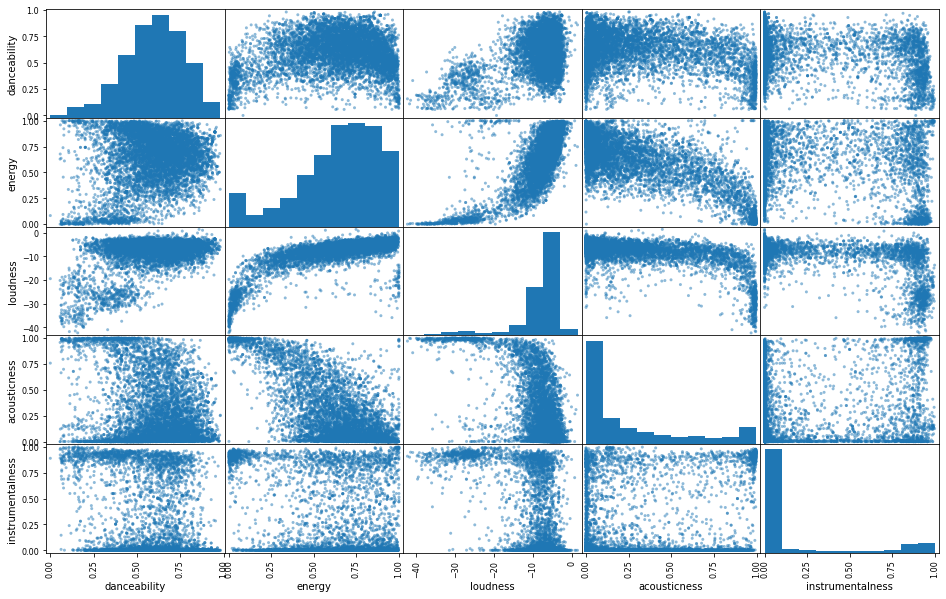

In [6]:
attributes = ['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness']

pd.plotting.scatter_matrix(playlist_df[attributes], figsize=(16,10))

In [8]:
#establishing the connection
conn = psycopg2.connect(
   database="playlist_db", user='postgres', password=db_password, host='127.0.0.1', port= '5433'
)

In [9]:
#Setting auto commit false
conn.autocommit = True

#Creating a cursor object using the cursor() method
cursor = conn.cursor()

In [10]:
#Retrieving ALL data
cursor.execute('''
SELECT *
FROM features AS f
JOIN playlists AS p
ON f.uri = p.track_uri;
''')

In [11]:
#Fetching all rows from the table
result = cursor.fetchall();
print(result)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [12]:
machine_learning_df = pd.DataFrame(result)

In [13]:
#Closing the connection
conn.close()

In [14]:
# this layout is for a full join
machine_learning_df = machine_learning_df.rename(columns=
                                 {
                                  0: 'danceability',
                                  1: 'energy',
                                  2: 'key',
                                  3: 'loudness',
                                  4: 'mode',
                                  5: 'speechiness',
                                  6: 'acousticness',
                                  7: 'instrumentalness',
                                  8: 'liveness',
                                  9: 'valence',
                                  10: 'tempo',
                                  11: 'type',
                                  12: 'id',
                                  13: 'uri',
                                  14: 'track_href',
                                  15: 'analysis_url',
                                  16: 'duration_ms',
                                  17: 'time_signature',
                                  18: 'playlist_name',
                                  19: 'followers',
                                  20: 'songs',
                                  21: 'genre_1',
                                  22: 'genre_2',
                                  23: 'playlist_uri',
                                  24: 'track_uri',
                                  25: 'popularity',
                                  26: 'artist_name',
                                  27: 'song_name'
                                 })                  

In [15]:
machine_learning_df['duration_mins'] = pd.to_datetime(machine_learning_df['duration_ms'], unit='ms').dt.strftime('%H:%M:%S')

In [17]:
machine_learning_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,followers,songs,genre_1,genre_2,playlist_uri,track_uri,popularity,artist_name,song_name,duration_mins
0,0.798,0.697,0,-7.139,1,0.0891,0.0202,0.0,0.259,0.745,...,"4,113,578",52,K-Pop,Pop,spotify:playlist:37i9dQZF1DX9tPFwDMOaN1,spotify:track:0skYUMpS0AcbpjcGsAbRGj,88,BLACKPINK,Pink Venom,00:03:06
1,0.798,0.697,0,-7.139,1,0.0891,0.0202,0.0,0.259,0.745,...,"295,173",70,Pop,Rock,spotify:playlist:37i9dQZF1DX6tPTxr8qwRe,spotify:track:0skYUMpS0AcbpjcGsAbRGj,87,BLACKPINK,Pink Venom,00:03:06
2,0.798,0.697,0,-7.139,1,0.0891,0.0202,0.0,0.259,0.745,...,"2,642,529",87,Pop,Indie,spotify:playlist:37i9dQZF1DWUa8ZRTfalHk,spotify:track:0skYUMpS0AcbpjcGsAbRGj,87,BLACKPINK,Pink Venom,00:03:06
3,0.798,0.697,0,-7.139,1,0.0891,0.0202,0.0,0.259,0.745,...,"762,848",50,Pop,Pop,spotify:playlist:37i9dQZF1DX0kbJZpiYdZl,spotify:track:0skYUMpS0AcbpjcGsAbRGj,87,BLACKPINK,Pink Venom,00:03:06
4,0.798,0.697,0,-7.139,1,0.0891,0.0202,0.0,0.259,0.745,...,"31,728,611",50,Pop,R&B,spotify:playlist:37i9dQZF1DXcBWIGoYBM5M,spotify:track:0skYUMpS0AcbpjcGsAbRGj,87,BLACKPINK,Pink Venom,00:03:06


In [18]:
machine_learning_df.to_csv('Resources/test_data.csv')

In [16]:
ml_matrix = machine_learning_df.corr(method='pearson')

ml_matrix['popularity'].sort_values(ascending=False)

popularity          1.000000
danceability        0.304426
loudness            0.202291
valence             0.161181
speechiness         0.121431
energy              0.108204
tempo               0.064661
time_signature      0.014354
liveness            0.007356
key                -0.001134
mode               -0.025989
acousticness       -0.101721
songs              -0.130321
duration_ms        -0.196236
instrumentalness   -0.312154
Name: popularity, dtype: float64

In [19]:
machine_learning_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12419 entries, 0 to 12418
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      12419 non-null  float64
 1   energy            12419 non-null  float64
 2   key               12419 non-null  int64  
 3   loudness          12419 non-null  float64
 4   mode              12419 non-null  int64  
 5   speechiness       12419 non-null  float64
 6   acousticness      12419 non-null  float64
 7   instrumentalness  12419 non-null  float64
 8   liveness          12419 non-null  float64
 9   valence           12419 non-null  float64
 10  tempo             12419 non-null  float64
 11  type              12419 non-null  object 
 12  id                12419 non-null  object 
 13  uri               12419 non-null  object 
 14  track_href        12419 non-null  object 
 15  analysis_url      12419 non-null  object 
 16  duration_ms       12419 non-null  int64 

In [ ]:
plt.scatter(machine_learning_df.danceability, machine_learning_df.popularity)
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()

In [ ]:
ticks = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]

plt.hist(machine_learning_df['popularity'])
plt.xlabel("Popularity", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.xticks(ticks)